In [ ]:

import pandas as pd
import numpy as np
import random

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder

SEED_VALUE=123
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

In [ ]:

df = pd.read_csv('weatherAUS.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
num_cols= [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

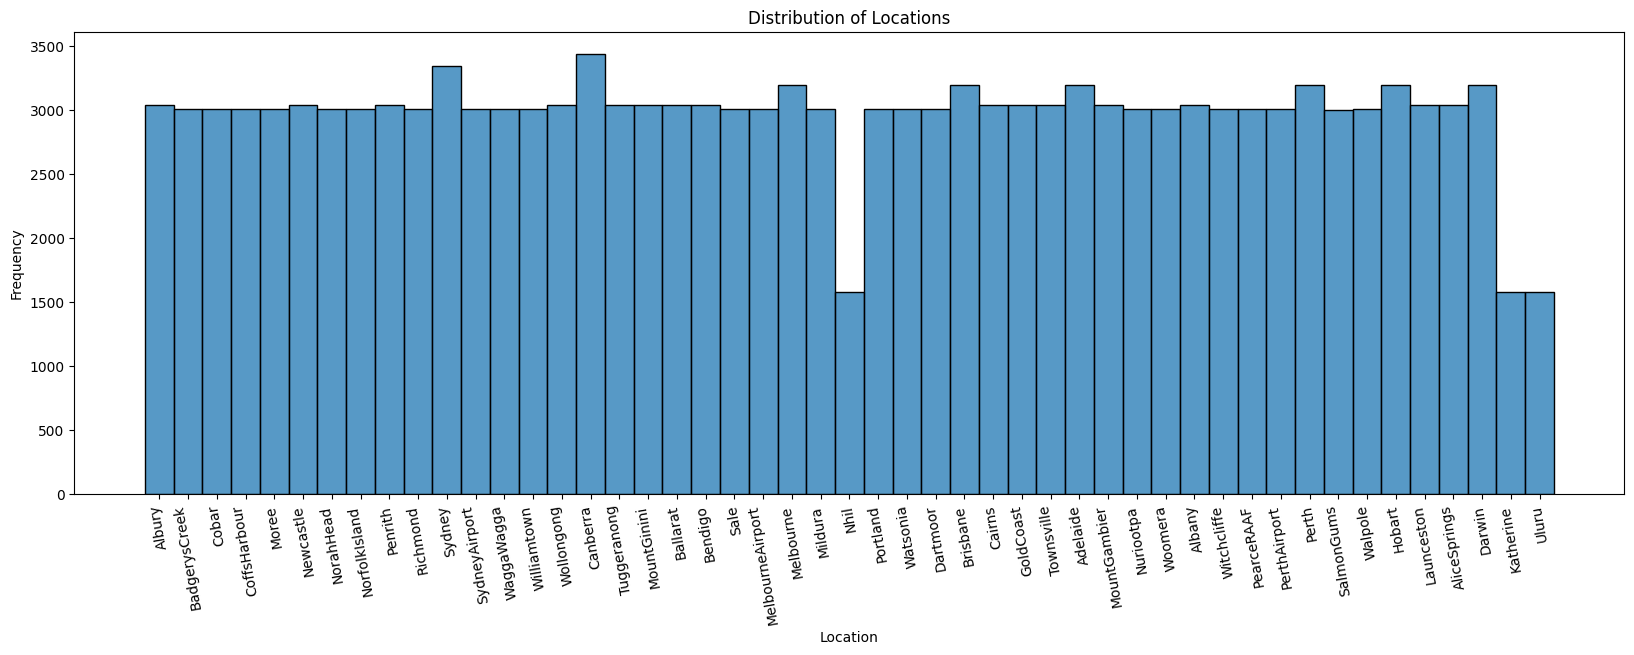

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(df['Location'])
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=100)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

In [ ]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 123)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.25,random_state = 123)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(87276, 22) (87276,)
(29092, 22) (29092,)
(29092, 22) (29092,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train[num_cols])
X_val_scaled = scaler.transform(x_val[num_cols])
X_test_scaled = scaler.transform(x_test[num_cols])

In [ ]:
model = tf.keras.Sequential(
    [
        Dense(9, activation="relu",input_shape=(16,)),
        Dense(3, activation="relu"),
        Dense(1, activation='sigmoid'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 153       
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
inputs = tf.keras.Input(shape=(16,))
dense1 = Dense(64, activation="relu")(inputs)
dense2 = Dense(32,activation=tf.keras.layers.LeakyReLU(alpha=0.2))(dense1)
cat_layer = tf.keras.layers.Concatenate(axis=1)([dense1,dense2])
out = Dense(1,activation='sigmoid')(cat_layer)

model = Model(inputs=inputs, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 64)                   1088      ['input_1[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 32)                   2080      ['dense_3[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 96)                   0         ['dense_3[0][0]',             
                                                                     'dense_4[0][0]']         

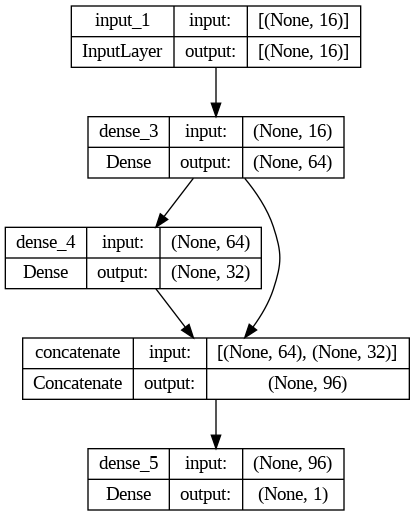

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
              ,loss='binary_crossentropy'
              , metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision()])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=64)

Epoch 1/20
1091/1091 [==============================] - 10s 6ms/step - loss: 0.3686 - binary_accuracy: 0.8406 - precision: 0.6987 - val_loss: 0.3574 - val_binary_accuracy: 0.8477 - val_precision: 0.6857
Epoch 2/20
1091/1091 [==============================] - 8s 7ms/step - loss: 0.3529 - binary_accuracy: 0.8476 - precision: 0.7195 - val_loss: 0.3516 - val_binary_accuracy: 0.8488 - val_precision: 0.7260
Epoch 3/20
1091/1091 [==============================] - 3s 3ms/step - loss: 0.3498 - binary_accuracy: 0.8490 - precision: 0.7237 - val_loss: 0.3502 - val_binary_accuracy: 0.8492 - val_precision: 0.7246
Epoch 4/20
1091/1091 [==============================] - 2s 2ms/step - loss: 0.3473 - binary_accuracy: 0.8499 - precision: 0.7253 - val_loss: 0.3497 - val_binary_accuracy: 0.8505 - val_precision: 0.7088
Epoch 5/20
1091/1091 [==============================] - 3s 2ms/step - loss: 0.3458 - binary_accuracy: 0.8510 - precision: 0.7296 - val_loss: 0.3507 - val_binary_accuracy: 0.8503 - val_precisi

In [ ]:
model.evaluate(X_test_scaled, y_test)
model.evaluate(X_test_scaled, y_test)

910/910 [==============================] - 1s 1ms/step - loss: 0.3430 - binary_accuracy: 0.8514 - precision: 0.7235


[0.3430000841617584, 0.8514367938041687, 0.7234992384910583]

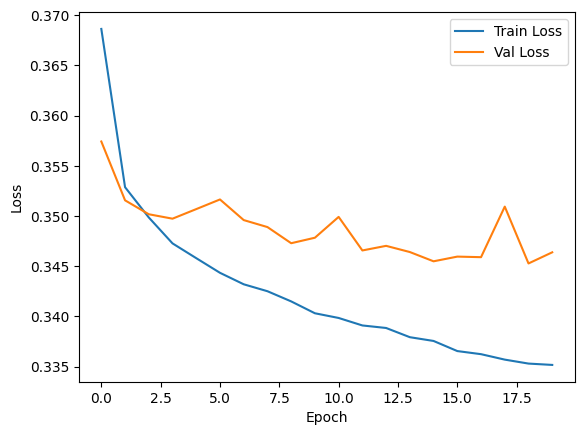

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model.save('functional_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
x = tf.keras.models.load_model('functional_model.h5')
x.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 64)                   1088      ['input_1[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 32)                   2080      ['dense_3[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 96)                   0         ['dense_3[0][0]',             
                                                                     'dense_4[0][0]']         

In [ ]:
model.save_weights('function_weights')

In [ ]:
model.load_weights('function_weights')

In [ ]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(16, 64) dtype=float32, numpy=
 array([[-0.02962762, -0.17309317,  0.09963001, ..., -0.33025125,
         -0.04270183, -0.11110086],
        [ 0.48080227, -0.3840462 , -0.17068262, ...,  0.37085104,
          0.369448  ,  0.18900594],
        [ 0.21351421, -0.23861638,  0.13930841, ..., -0.01893469,
         -0.05038767,  0.12411474],
        ...,
        [ 0.00764274,  0.06262664, -0.27647862, ..., -0.16452579,
          0.17783555,  0.03264346],
        [ 0.20471367, -0.15874983,  0.1368393 , ..., -0.48992157,
          0.06220486, -0.38104314],
        [ 0.08156868,  0.5126968 ,  0.11808926, ...,  0.08300912,
          0.05245502, -0.02970207]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(64,) dtype=float32, numpy=
 array([-1.54829308e-01,  1.61095895e-02, -1.72502026e-01, -1.42407790e-01,
         2.48456448e-02, -2.00103372e-01,  9.04403031e-02, -5.76522648e-01,
        -7.67610371e-02, -5.25709748e-01, -2.08271906e-01, -4.15209457

# **SUMMARY**
Grafik ini memperlihatkan perbandingan antara train loss dan val loss sepanjang berbagai epoch dalam pelatihan model neural network. Terlihat bahwa train loss mengalami penurunan yang tajam di awal dan terus menurun secara bertahap, menunjukkan bahwa model semakin baik dalam memprediksi data pelatihan. Namun, val loss, meskipun turun di awal, menunjukkan peningkatan dan fluktuasi setelahnya. Fluktuasi ini mencerminkan bahwa model kursng stabil dan menyebabkan overfitting.